# Calculus and Algebra problems

## Calculus

Calculus is not obscure. It is the language for modeling behaviors. Calculus enables us to find the rate of changes in order to optimise a function. Without calculus, we would not be able to fully understand techniques such as:

Backpropagation in neural networks

Regression using optimal least square

Expectation maximization in fitting probability models

### Exercise 1

Let’s say in my office, it takes me 10 seconds (time) to travel 25 meters (distance) to the coffee machine.
If we want to express the above situation as a function, then it would be:

distance = speed * time

So for this case, speed is the first derivative of the distance function above. As speed describes the rate of change of distance over time, when people say taking the first derivative of a certain function, they mean finding out the rate of change of a function.

**Find the speed and build the linear function on distance $(d)$ over time $(t)$, when $(t ∈ [0,10])$.**

In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import sympy as sy


#define the distance function
speed=25/10 #speed measured in metres per seconds
def d(t): return speed*t
t=np.linspace(0,10,100).reshape((100,1))
dist=d(t).reshape((100,1))

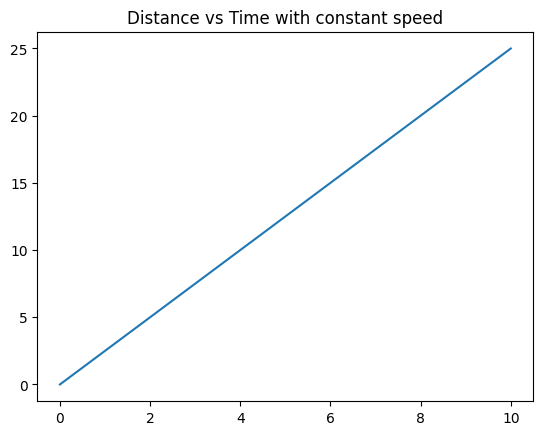

In [3]:
#plot the distance function on domain(t)
plt.plot(t,dist)
plt.title('Distance vs Time with constant speed')
plt.show()

In [4]:
# create a dataframe
derivatives=pd.DataFrame(dist, columns=['distance_lin'])
derivatives['time']=t
derivatives


,distance_lin,time
0,0.000000,0.00000
1,0.252525,0.10101
2,0.505051,0.20202
3,0.757576,0.30303
4,1.010101,0.40404
...,...,...
95,23.989899,9.59596
96,24.242424,9.69697
97,24.494949,9.79798
98,24.747475,9.89899


### Exercise 2

It turned out that I wasn't walking a constant speed towards getting my coffee but I was accelerating (my speed increased over time). If initial speed = 0, it still took me 10 seconds to travel from my seat to my coffee but I was walking faster and faster.

$V_o$ = initial speed = $0$

t = time

a = acceleration

**distance** = $V_o * t + 0.5 * a * (t^2)$

**speed** = $V_o + a * t$

The first derivative of the speed function is acceleration. I realise that the speed function is closely related to the distance function.

**Find the acceleration value and build the quadratic function  $(t ∈ [0,10])$. Also create a graph and a table.**

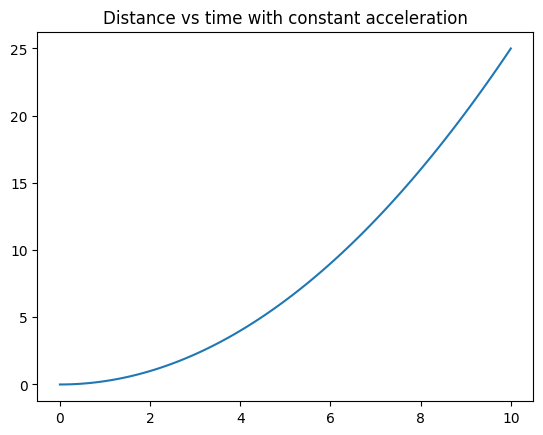

In [5]:
#define and plot the quadratic funtion
a=25/(0.5*10**2) #acceleration measured in meters per second squared
def d_2(t): return 0.5*a*t**2

dist_sq=d_2(t)

plt.plot(t,dist_sq)
plt.title('Distance vs time with constant acceleration')
plt.show()

In [6]:
#create a dataframe
derivatives['distance_sq']=dist_sq
derivatives.head(10)

,distance_lin,time,distance_sq
0,0.000000,0.000000,0.000000
1,0.252525,0.101010,0.002551
2,0.505051,0.202020,0.010203
3,0.757576,0.303030,0.022957
4,1.010101,0.404040,0.040812
5,1.262626,0.505051,0.063769
6,1.515152,0.606061,0.091827
7,1.767677,0.707071,0.124987
8,2.020202,0.808081,0.163249
9,2.272727,0.909091,0.206612


Before exercise 3, we'll make a brief introduction to Gradient Descent algorithm, which will have a larger explanation in future modules of the bootcamp.

Gradient Descent algorithm is the hero behind the family of deep learning algorithms. When an algorithm in this family runs, it tries to minimize the error between the training input and predicted output. This minimization is done by optimization algorithms and gradient descent is the most popular one.

Let’s say you have these input & output pairs:

```py
input:
[
 [1,2],
 [3,4]
]

output:

[
 [50],
 [110]
]
```
We can estimate that if we multiply the input values by [10, 20], we can have the output as shown above.
```py
1(10) + 2(20) = 50

3(10) + 4(20) = 110
```
When a machine learning algorithm starts running, it assigns random values and makes a prediction. 
Let’s say it assigned [1,2] values:
```py
1(1) + 2(2) = 5

3(1) + 4(2) = 11
```
Once it has the predictions, it calculates the error: the difference between the real data and the predicted data. There are many ways to calculate the error and they are called loss functions. 
Once we have this value, the optimization algorithm starts showing itself and it sets new values which replace the initial random values. 

And, the loop continues until a condition is met. That condition can be to loop n times, or to loop until error is smaller than a value.

It can be hard to understand **gradient descent** without understanding **gradient**. So, let’s focus on what gradient is. The gradient shows the direction of the greatest change of a scalar function. The gradient calculation is done with derivatives, so let’s start with a simple example. To calculate the gradient, we just need to remember some linear algebra calculations from high school because we need to calculate derivatives.

Let’s say we want to find the minimum point of $f(x) = x^2$. The derivative of that function is $df(x)=2^x$. 

The gradient of $f(x)$ at point $x=-10$

is 

$df(-10)=-20$.

The gradient of $f(x)$ at point $x=1$

is 

$df(1)=2$.

Now let’s visualize $f(x)$ and those $x=-10$ and $x=1$ points.

In [7]:
import numpy as np
import seaborn as sns

def f(x):
    return x**2

def df(x):
    return 2*x

def visualize(f, x=None):
    
    xArray = np.linspace(-10, 10, 100) 
    yArray = f(xArray)
    sns.lineplot(x=xArray, y=yArray)
    
    if x is not None:
        assert type(x) in [np.ndarray, list] # x should be numpy array or list
        if type(x) is list: # if it is a list, convert to numpy array
            x = np.array(x)

            
        y = f(x)
        sns.scatterplot(x=x, y=y, color='red')

/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

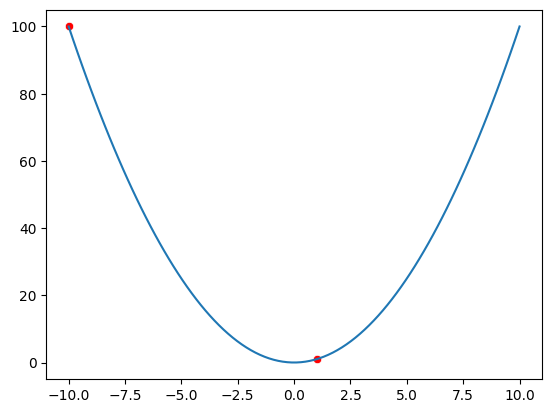

In [8]:
visualize(f, x=[-10, 1])

The red dot at x=-10 does not know the surface it stands on and it only knows the coordinates of where it stands and that the gradient of itself which is -20. And the other red dot at x=1 does not know the surface it stands on and it only knows the coordinates of where it stands and that the gradient of itself which is 2.

By having only this information: we can say that the red dot at x=-10 should make a bigger jump than x=1 because it has a bigger absolute gradient value. The sign shows the direction. - shows that the red dot at x=-10 should move to the right and the other one should move to the left.

In summary; the red dot at x=-10 (gradient: -20) should make a bigger jump to the right and the red dot at x=1 (gradient: 2) should make a smaller jump to the left. 

We know that the jump length should be proportional to the gradient, but what is that value exactly? We don’t know. So, let’s just say that red points should move with the length of alpha*gradient where alpha is just a parameter.

We can say that the new location of the red dot should be calculated with the following formula:

x = x - gradient * alpha

Now let's implement this with **Numpy**. Let’s start with visualizing $f(x)=x^2$ function and $x=-10$ point.

/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

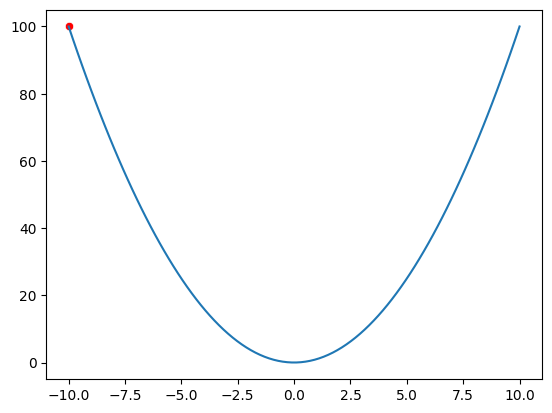

In [9]:
visualize(f, x=[-10])

The following code implements the whole logic explained before:

In [10]:
def gradient_descent(x, nsteps=1):
    
    
    #collectXs is an array to store how x changed in each iteration, 
    #so we can visualize it later
    
    collectXs = [x]
    
    #learning_rate is the value that we mentioned as alpha in previous section
    
    learning_rate = 1e-01
    
    for _ in range(nsteps):
        
        #the following one line does the real magic
        #the next value of x is calculated by subtracting the gradient*learning_rate by itself
        #the intuation behind this line is in the previous section
        
        x -= df(x) * learning_rate 
        collectXs.append(x)
        
    #we return a tuple that contains
    #x -> recent x after nsteps 
    #collectXs -> all the x values that was calculated so far
    
    return x, collectXs

Before running gradient descent with 1000 steps, let’s just run it twice, one step at a time to see how x evolves. 
We start with x=-10 and it evolves to x=-8. We know that when x=0 that is the **minimum point**, so, yes it is evolving in the correct direction.

In [11]:
x=-10
x, collectedXs = gradient_descent(x, nsteps=1)
print(x)

-8.0


In [12]:
#The next step will start at x=-8. Let's run gradient for 1 step

x, collectedXs = gradient_descent(x, nsteps=1)
print(x)

-6.4


It goes to x=-6.4. Excelent. Now let's run it 1000 times

In [13]:
x, collectedXs = gradient_descent(x, nsteps=1000)
print(x)

-7.873484301831169e-97


/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

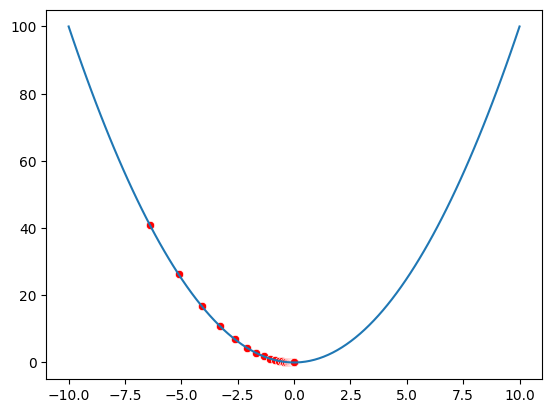

In [14]:
visualize(f, x=collectedXs)

### Exercise 3

When I arrive to the coffee machine, I hear my colleague talking about the per-unit costs of producing 'product B' for the company. As the company produces more units, the per-unit costs continue to decrease until a point where it starts to increase.

To optimise the per-unit production cost at its minimal to optimise efficiency, the company would need to find the number of units to be produced where the per-unit production costs begin to change from decreasing to increasing.

**Build a quadratic function $f(x)=0.1(x)^2−9x +4500$ on $x∈[0,100]$  to create the per-unit cost function, and make a conclusion.**

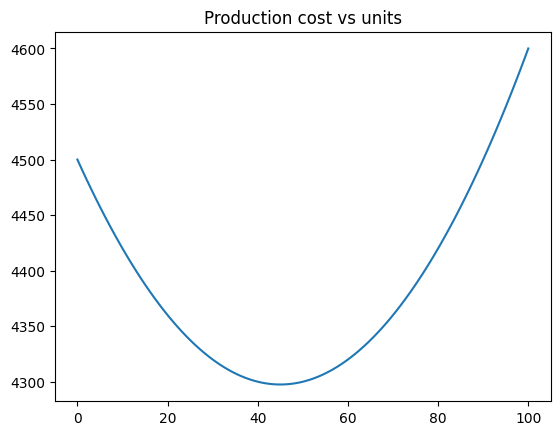

In [15]:
#define and plot the funtion
#NOTE:cost function c(u) where 'u' represents production units
def c(u): 
    return 0.1*(u**2)-9*u+4500

units=np.linspace(0,100,100)
cost=c(units)

plt.plot(units,cost)
plt.title('Production cost vs units')
plt.show()


*****************CONCLUSION: After 40ish production units, the production cost starts to increase********* 

We saw with Gradient Descent how the red dot navigates in an environment it does not know about. It only knows the coordinates of where it is and its gradient. The red dot could find the minimum point by using only this knowledge and gradient descent algorithm.

**Optional:**

Implement all the previous steps to create a gradient descent algorithm to see how the per-unit cost evolves, with a starting point of 0 units of production.

The optimal level of production units that minimise the cost is: 45.0 units


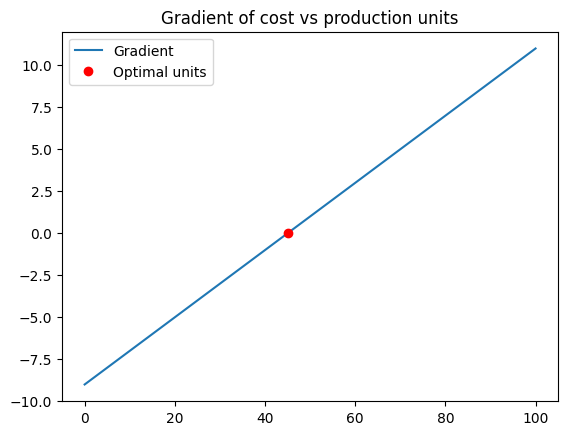

In [16]:
#NOTE: 
# A faster approach would be to calculate the derivative of c(u) and set it =0 to find the 
#optimal level of production units that minimise the cost. In other words, one could
#find the number of production units where the gradient is equal to zero

#The derivative is: dc(u)=2*0.1*(u)-9 , to find the optimal units:
optimal_u=9/(2*0.1) #This comes from finding u after setting the derivative ==0
print('The optimal level of production units that minimise the cost is: '+ str(optimal_u)+ ' units')

def dc(u):
    return 2*0.1*(u)-9

d_cost=dc(units) #Evaluating the derivative on the same range of production units [0,100]
plt.plot(units,d_cost, label='Gradient')
plt.plot(optimal_u,dc(optimal_u), 'ro',label='Optimal units')
plt.title('Gradient of cost vs production units')
plt.legend()
plt.show()

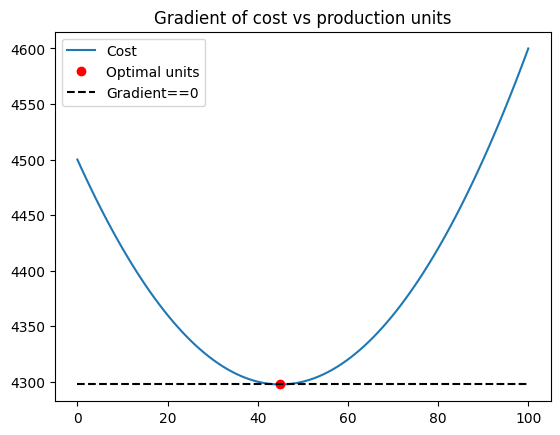

In [17]:
#If now I plot the optimal units in the original cost function with its tangent line where the
#gradient is ==0:
plt.plot(units,cost, label='Cost')
plt.plot(optimal_u,c(optimal_u), 'ro',label='Optimal units')
plt.plot(units,[c(optimal_u)]*100, '--k',label='Gradient==0')
plt.title('Gradient of cost vs production units')
plt.legend()
plt.show()


## Linear Algebra

### Exercise 1 : Sum of two matrices

Suppose we have two matrices A and B.
```py
A = [[1,2],[3,4]]
B = [[4,5],[6,7]]

then we get
A+B = [[5,7],[9,11]]
A-B = [[-3,-3],[-3,-3]]
```

Make the sum of two matrices using Python with Numpy

In [18]:
# creating first matrix
A = np.array([[1,2],[3,4]])

# creating second matrix
B = np.array([[4,5],[6,7]])
 
#print elements
print(A)
print(B)
 
# adding two matrix
print(A+B)

[[1 2]
 [3 4]]
[[4 5]
 [6 7]]
[[ 5  7]
 [ 9 11]]


### Exercise 2: Sum of two lists

There will be many situations in which we'll have to find index wise summation of two different lists. This can have possible applications in day-to-day programming. In this exercise we will solve the same problem with various ways in which this task can be performed.

We have the following two lists:
```py
list1 = [2, 5, 4, 7, 3]
list2 = [1, 4, 6, 9, 10]
```

Now let's use Python code to demonstrate addition of two lists.


In [19]:
# Naive method

# initializing lists
list1 = [2, 5, 4, 7, 3]
list2 = [1, 4, 6, 9, 10]
 
# printing original lists
print ("Original list 1 : " + str(list1))
print ("Original list 2 : " + str(list2))
 
# using naive method to 
# add two list 
res_list = []
for i in range(0, len(list1)):
 res_list.append(list1[i] + list2[i])
 
# printing resultant list 
print ("Resultant list is : " + str(res_list))

Original list 1 : [2, 5, 4, 7, 3]
Original list 2 : [1, 4, 6, 9, 10]
Resultant list is : [3, 9, 10, 16, 13]


Now use the following three different methods to make the same calculation: sum of two lists

In [20]:
# Use list comprehensions to perform addition of the two lists:

# initializing lists
one=[1,2,3,4,5]
two=[4,7,9,5,2]
 
# printing original lists
print("Original list 1 : " + str(one))
print("Original list 1 : " + str(two))
 
# using list comprehension to add two list 
result=[]
for i in range(0,len(one)):
    result.append(one[i]+two[i])
 
# printing resultant list 
print ("Result list is : " + str(result))


Original list 1 : [1, 2, 3, 4, 5]
Original list 1 : [4, 7, 9, 5, 2]
Result list is : [5, 9, 12, 9, 7]


In [21]:
# Use map() + add():
from operator import add

# initializing lists
one=[1,2,3,4,5]
two=[4,7,9,5,2]
 
# printing original lists
print("Original list 1 : " + str(one))
print("Original list 1 : " + str(two))
 
# using map() + add() to add two list 
result_map=list(map(add, one, two))

# printing resultant list 
print ("Result list is : " + str(result_map))


Original list 1 : [1, 2, 3, 4, 5]
Original list 1 : [4, 7, 9, 5, 2]
Result list is : [5, 9, 12, 9, 7]


In [22]:
# Use zip() + sum():

# initializing lists
one=[1,2,3,4,5]
two=[4,7,9,5,2]
 
# printing original lists
print("Original list 1 : " + str(one))
print("Original list 1 : " + str(two))

 
# Using zip() + sum() to add two list 
result_zip=[sum(pairs) for pairs in list(zip(two, one))]
 
# printing resultant list 
print ("Result list is : " + str(result_zip))

Original list 1 : [1, 2, 3, 4, 5]
Original list 1 : [4, 7, 9, 5, 2]
Result list is : [5, 9, 12, 9, 7]


### Exercise 3 : Dot multiplication

We have two matrices:
```py
matrix1 = [[1,7,3],
 [ 4,5,2],
 [ 3,6,1]]
matrix2 = [[5,4,1],
 [ 1,2,3],
 [ 4,5,2]]
```

A simple technique but expensive method for larger input datasets is using for loops. In this exercise we will first use nested for loops to iterate through each row and column of the matrices, and then we will perform the same multiplication using Numpy.

In [23]:
#Using a for loop input two matrices of size n x m
matrix1 = [[1,7,3],
 [ 4,5,2],
 [ 3,6,1]]
matrix2 = [[5,4,1],
 [ 1,2,3],
 [ 4,5,2]]
 
res = [[0 for x in range(3)] for y in range(3)]
 
# explicit for loops
for i in range(len(matrix1)):
    for j in range(len(matrix2[0])):
        for k in range(len(matrix2)):
 
 # resulted matrix
            res[i][j] += matrix1[i][k] * matrix2[k][j]
 
print (res)

[[24, 33, 28], [33, 36, 23], [25, 29, 23]]


MATRIX MULTIPLICATION:

In [24]:
# Import libraries
#libraries already imported
 
# input two matrices
#I'll use the same two matrices from above
A=np.array(matrix1)
B=np.array(matrix2)
 
 # This will return dot product
matrix_multip=np.dot(A,B)
 
# print resulted matrix: This is matrix multiplication
print('When the input of in the fuction nd.dot() are 2-D arrays, \n the function performs a **matrix multiplication**, \n which leads to the following result: \n'+ str(matrix_multip))

When the input of in the fuction nd.dot() are 2-D arrays, 
 the function performs a **matrix multiplication**, 
 which leads to the following result: 
[[24 33 28]
 [33 36 23]
 [25 29 23]]



https://www.youtube.com/channel/UCXq-PLvYAX-EufF5RAPihVg

https://www.geeksforgeeks.org/

https://medium.com/@seehleung/basic-calculus-explained-for-machine-learning-c7f642e7ced3

https://blog.demir.io/understanding-gradient-descent-266fc3dcf02f